# eda - for the observation_based data

spz_Wasserstand_analyse\data\wasserstand\camels_ch\timeseries\observation_based

In [1]:
# Grundlegende Libraries importieren
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller


## Andermatt

| Column Name              | Bedeutung                                                                                               |
|--------------------------|---------------------------------------------------------------------------------------------------------|
| date                     | Datum der Messung.                                                                     |
| discharge_vol (m³/s)     | Gemessener Abfluss (Volumen) des Gewässers in Kubikmeter pro Sekunde.                                  |
| discharge_spec (mm/d)    | Spezifischer Abfluss in Millimeter pro Tag – normierter Abfluss bezogen auf die Fläche des Einzugsgebiets. |
| waterlevel (m)           | Wasserstand im Gewässer in Metern.                                                                     |
| precipitation (mm/d)     | Gemessene Niederschlagsmenge in Millimeter pro Tag.                                                    |
| temperature_min (°C)     | Gemessene minimale Lufttemperatur in Grad Celsius.                                                     |
| temperature_mean (°C)    | Gemessene durchschnittliche Lufttemperatur in Grad Celsius.                                            |
| temperature_max (°C)     | Gemessene maximale Lufttemperatur in Grad Celsius.                                                     |
| rel_sun_dur (%)          | Relative Sonnenscheindauer in Prozent, Verhältnis zur möglichen Sonnenscheindauer.                     |
| swe (mm)                 | Schnee-Wasser-Äquivalent in Millimeter – misst die Wassermenge im Schnee.                              |


In [2]:
df_observation_andermatt = pd.read_csv('../data/wasserstand/camels_ch/timeseries/observation_based/CAMELS_CH_obs_based_2087.csv')

# 'date'-Spalte in datetime-Format umwandeln
df_observation_andermatt['date'] = pd.to_datetime(df_observation_andermatt['date'])

# Als Index setzen
df_observation_andermatt.set_index('date', inplace=True)


df_observation_andermatt

,discharge_vol(m3/s),discharge_spec(mm/d),waterlevel(m),precipitation(mm/d),temperature_min(degC),temperature_mean(degC),temperature_max(degC),rel_sun_dur(%),swe(mm)
date,,,,,,,,,
1981-01-01,1.960,0.890,1426.559,7.96,-13.14,-7.66,-1.06,5.17,NaN
1981-01-02,1.763,0.801,1426.546,11.66,-13.26,-10.12,-3.96,0.44,NaN
1981-01-03,1.827,0.830,1426.550,33.11,-8.13,-3.90,-0.99,25.89,NaN
1981-01-04,1.837,0.835,1426.550,40.16,-13.63,-7.57,-4.23,0.05,NaN
1981-01-05,1.771,0.805,1426.546,12.72,-15.26,-14.08,-13.03,0.04,NaN
...,...,...,...,...,...,...,...,...,...
2020-12-27,2.546,1.157,1426.579,0.85,-12.28,-7.29,-3.80,0.04,218.0
2020-12-28,2.712,1.232,1426.589,0.67,-11.63,-8.97,-7.13,1.82,220.0
2020-12-29,2.616,1.188,1426.583,0.30,-10.72,-8.95,-7.50,0.18,221.0


In [3]:
# Übersicht & Kontrolle
print(df_observation_andermatt.info())
print(r'*****')
print(df_observation_andermatt.head())
print(r'*****')
print(df_observation_andermatt.describe())


# Fehltage analysieren
df_observation_andermatt.isna().sum()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14610 entries, 1981-01-01 to 2020-12-31
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   discharge_vol(m3/s)     14610 non-null  float64
 1   discharge_spec(mm/d)    14610 non-null  float64
 2   waterlevel(m)           14610 non-null  float64
 3   precipitation(mm/d)     14610 non-null  float64
 4   temperature_min(degC)   14610 non-null  float64
 5   temperature_mean(degC)  14610 non-null  float64
 6   temperature_max(degC)   14610 non-null  float64
 7   rel_sun_dur(%)          14610 non-null  float64
 8   swe(mm)                 8157 non-null   float64
dtypes: float64(9)
memory usage: 1.1 MB
None
*****
            discharge_vol(m3/s)  discharge_spec(mm/d)  waterlevel(m)  \
date                                                                   
1981-01-01                1.960                 0.890       1426.559   
1981-01-02               

discharge_vol(m3/s)          0
discharge_spec(mm/d)         0
waterlevel(m)                0
precipitation(mm/d)          0
temperature_min(degC)        0
temperature_mean(degC)       0
temperature_max(degC)        0
rel_sun_dur(%)               0
swe(mm)                   6453
dtype: int64

In [4]:
# Correlations

# Correlation with waterlevel(m)
corr = df_observation_andermatt.corr(numeric_only=True)
corr['waterlevel(m)'].sort_values(ascending=False)

waterlevel(m)             1.000000
discharge_spec(mm/d)      0.929226
discharge_vol(m3/s)       0.929226
temperature_min(degC)     0.583711
temperature_mean(degC)    0.576789
temperature_max(degC)     0.561642
precipitation(mm/d)       0.202508
swe(mm)                  -0.085142
rel_sun_dur(%)           -0.110789
Name: waterlevel(m), dtype: float64

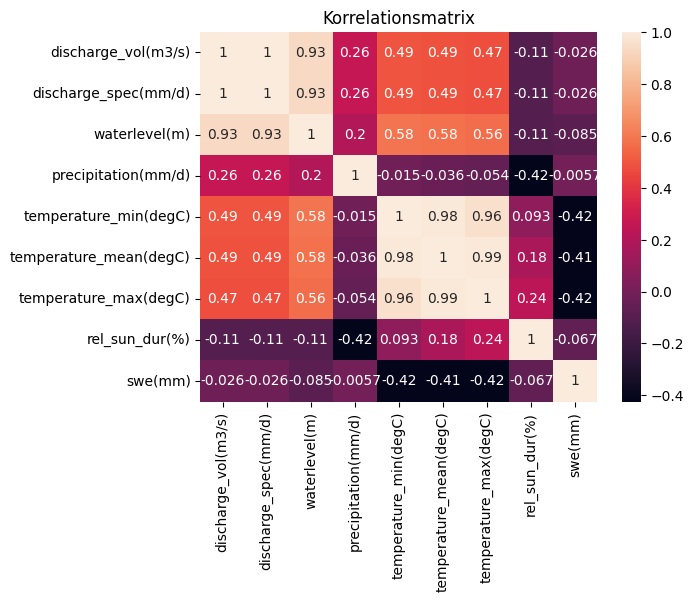

In [5]:
# Correlation of all variables
sns.heatmap(df_observation_andermatt.corr(), annot=True)
plt.title('Korrelationsmatrix')
plt.show()

according to the informations above we'll only keep the coefficients 'discharge_vol' and 'temperature_mean'

In [6]:
# check that there are as many datapoints as there are days between 01.01.1981 and 31.12.2018

start_date = datetime(1981, 1, 1)
end_date = datetime(2020, 12, 31)

delta = end_date - start_date
print(delta.days+1)

df_observation_andermatt.shape


14610


(14610, 9)

In [7]:
swe = df_observation_andermatt[df_observation_andermatt['swe(mm)'].notna()]
swe

,discharge_vol(m3/s),discharge_spec(mm/d),waterlevel(m),precipitation(mm/d),temperature_min(degC),temperature_mean(degC),temperature_max(degC),rel_sun_dur(%),swe(mm)
date,,,,,,,,,
1998-09-02,4.863,2.209,1426.807,0.08,6.86,10.37,15.08,39.10,0.0
1998-09-03,6.278,2.852,1426.855,17.01,6.08,8.47,12.29,25.30,0.0
1998-09-04,5.020,2.281,1426.814,37.83,4.72,8.19,12.63,43.10,0.0
1998-09-05,15.947,7.245,1427.069,13.04,1.68,4.07,7.50,6.04,0.0
1998-09-06,6.222,2.827,1426.857,0.00,1.37,5.56,10.73,86.75,1.0
...,...,...,...,...,...,...,...,...,...
2020-12-27,2.546,1.157,1426.579,0.85,-12.28,-7.29,-3.80,0.04,218.0
2020-12-28,2.712,1.232,1426.589,0.67,-11.63,-8.97,-7.13,1.82,220.0
2020-12-29,2.616,1.188,1426.583,0.30,-10.72,-8.95,-7.50,0.18,221.0


- swe(mm) gibt es Daten von 1998-09-02 - 2020-12-31

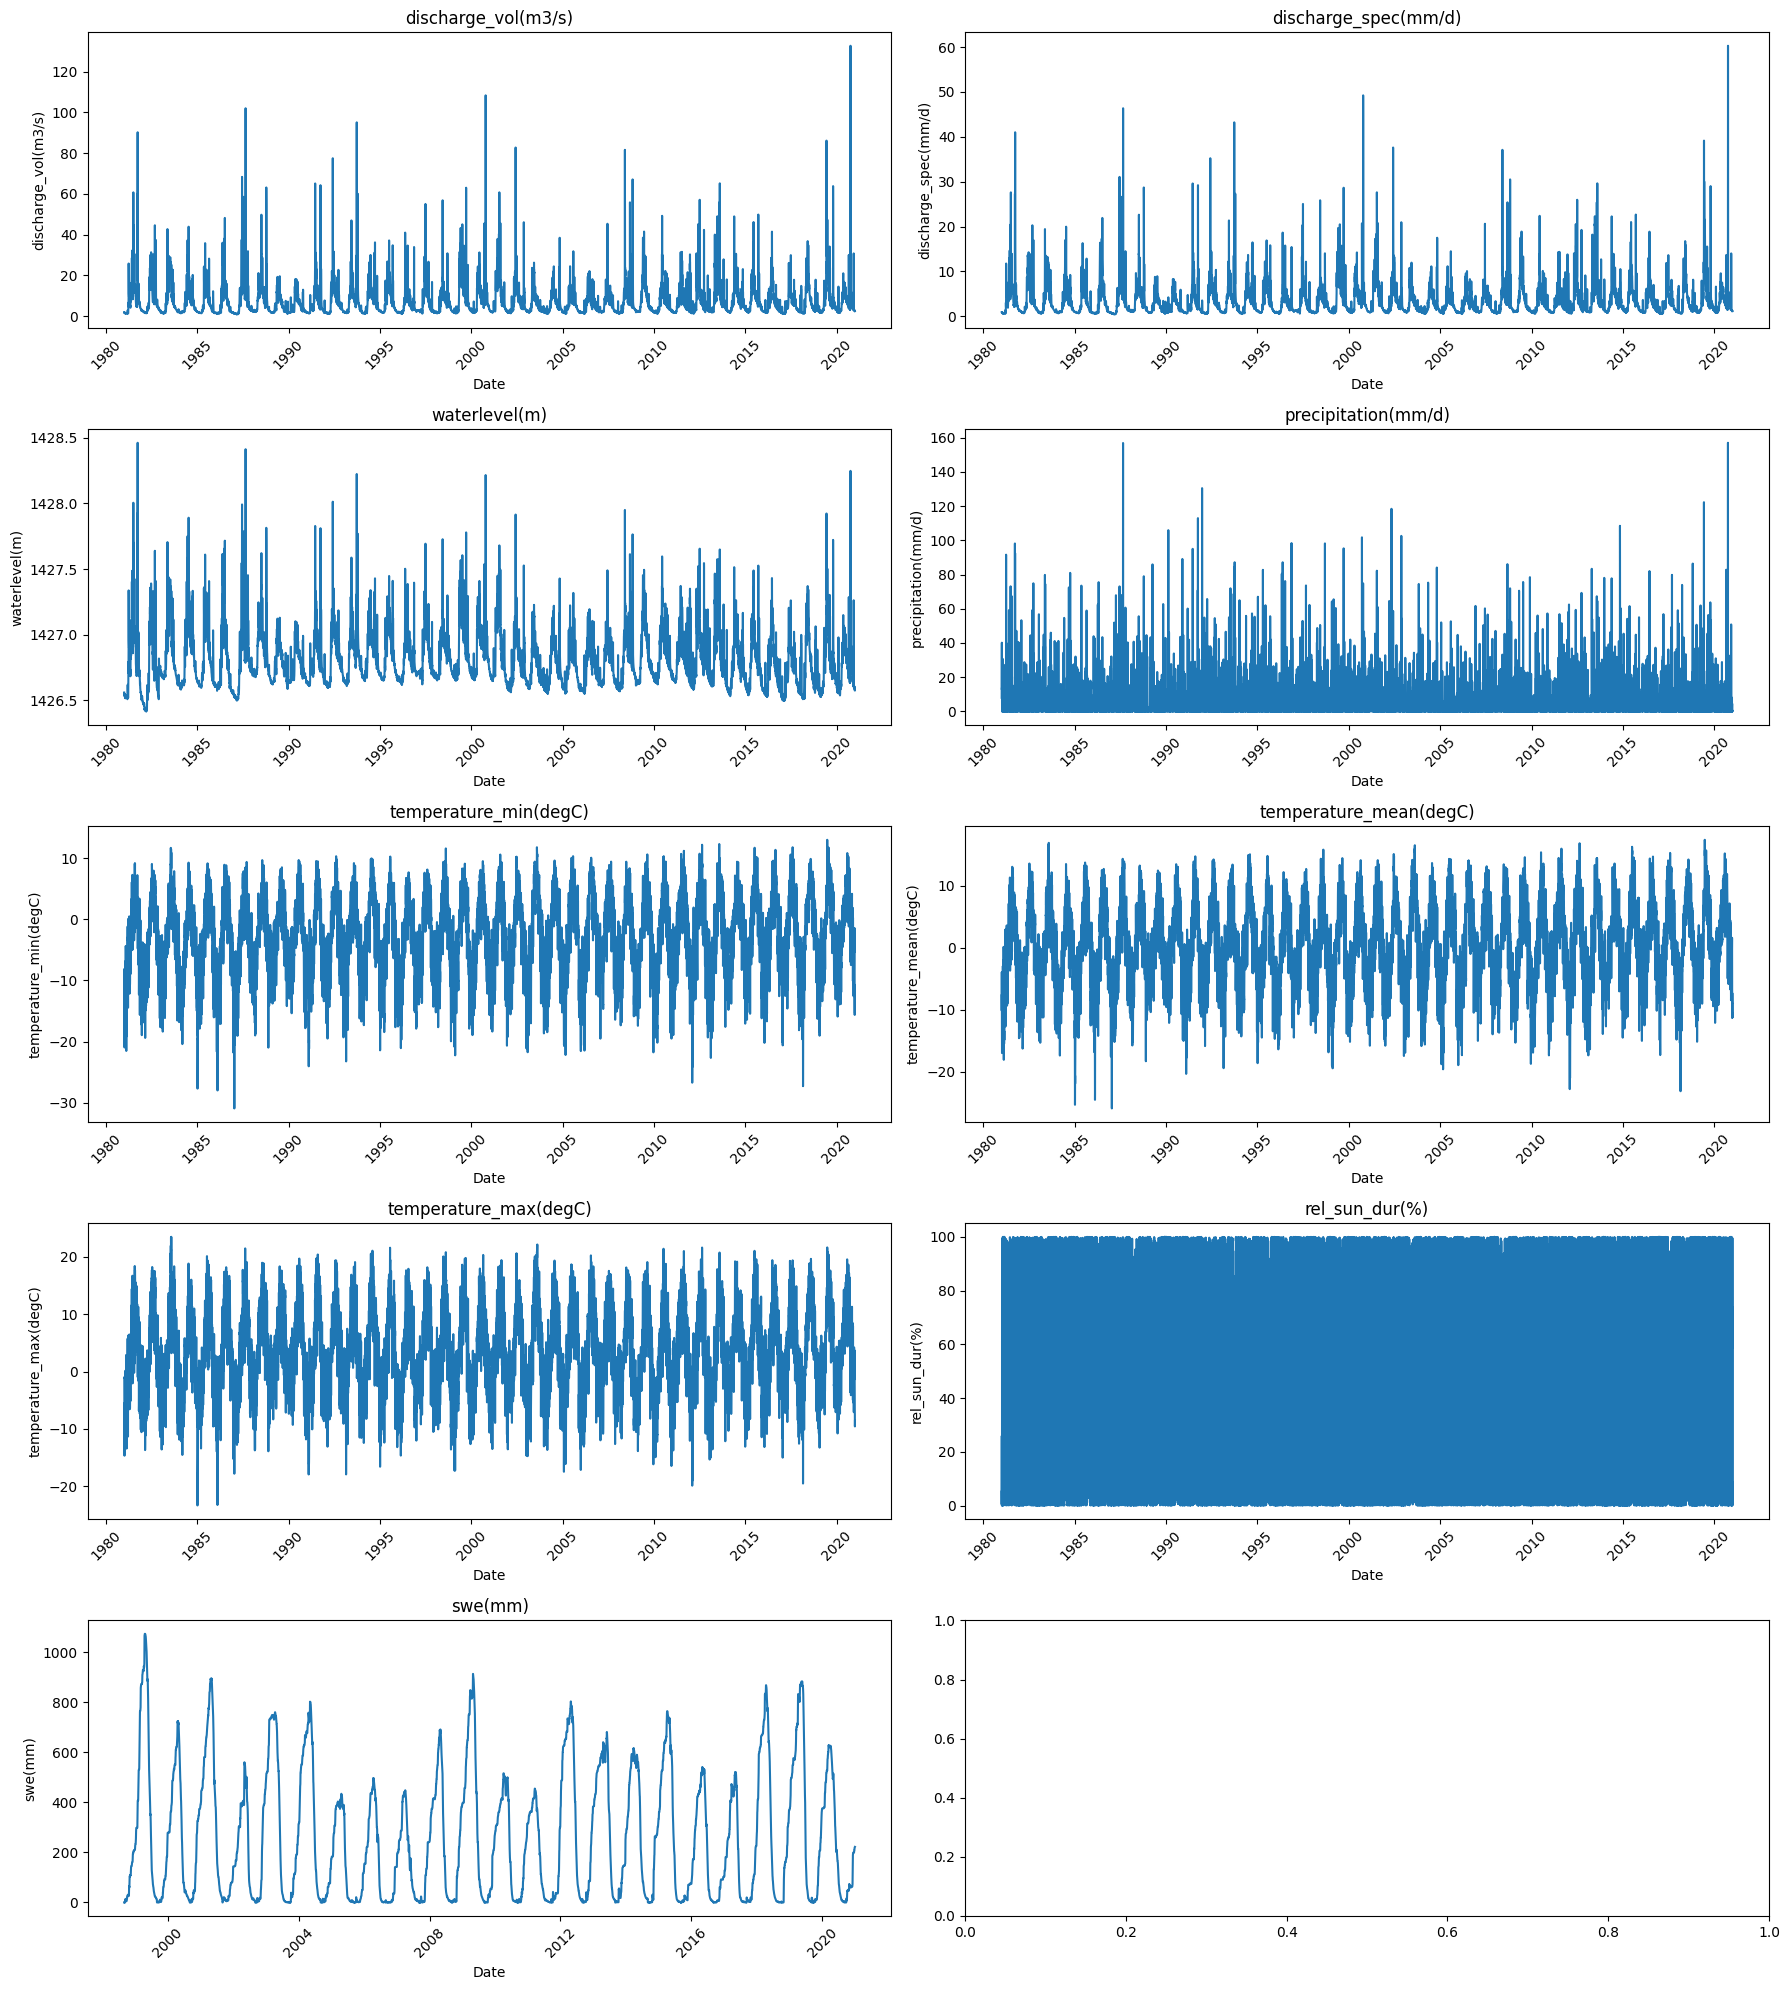

In [8]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(18, 20))
axes = axes.flatten()

for i, col in enumerate(df_observation_andermatt.columns):
    axes[i].plot(df_observation_andermatt.index, df_observation_andermatt[col])
    axes[i].set_title(col)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel(col)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show();


# Modellierung

## Zerlegung

In [9]:
# Libraries für Zeitreihenanalyse
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf, ccf

In [10]:
df_observation_andermatt

,discharge_vol(m3/s),discharge_spec(mm/d),waterlevel(m),precipitation(mm/d),temperature_min(degC),temperature_mean(degC),temperature_max(degC),rel_sun_dur(%),swe(mm)
date,,,,,,,,,
1981-01-01,1.960,0.890,1426.559,7.96,-13.14,-7.66,-1.06,5.17,NaN
1981-01-02,1.763,0.801,1426.546,11.66,-13.26,-10.12,-3.96,0.44,NaN
1981-01-03,1.827,0.830,1426.550,33.11,-8.13,-3.90,-0.99,25.89,NaN
1981-01-04,1.837,0.835,1426.550,40.16,-13.63,-7.57,-4.23,0.05,NaN
1981-01-05,1.771,0.805,1426.546,12.72,-15.26,-14.08,-13.03,0.04,NaN
...,...,...,...,...,...,...,...,...,...
2020-12-27,2.546,1.157,1426.579,0.85,-12.28,-7.29,-3.80,0.04,218.0
2020-12-28,2.712,1.232,1426.589,0.67,-11.63,-8.97,-7.13,1.82,220.0
2020-12-29,2.616,1.188,1426.583,0.30,-10.72,-8.95,-7.50,0.18,221.0


In [11]:
df_important_coef = df_observation_andermatt[['waterlevel(m)','discharge_vol(m3/s)','temperature_mean(degC)']]
df_important_coef

,waterlevel(m),discharge_vol(m3/s),temperature_mean(degC)
date,,,
1981-01-01,1426.559,1.960,-7.66
1981-01-02,1426.546,1.763,-10.12
1981-01-03,1426.550,1.827,-3.90
1981-01-04,1426.550,1.837,-7.57
1981-01-05,1426.546,1.771,-14.08
...,...,...,...
2020-12-27,1426.579,2.546,-7.29
2020-12-28,1426.589,2.712,-8.97
2020-12-29,1426.583,2.616,-8.95


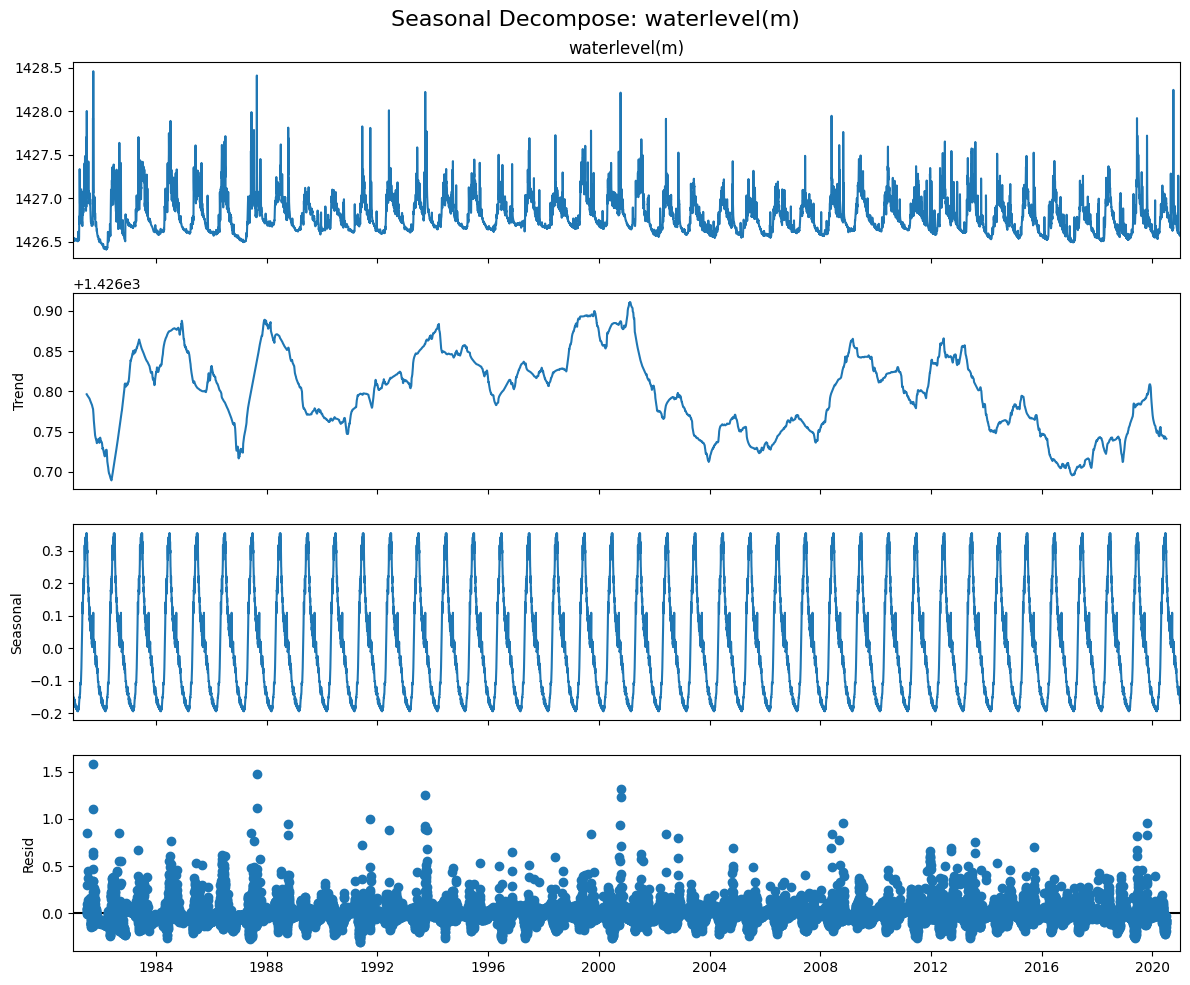

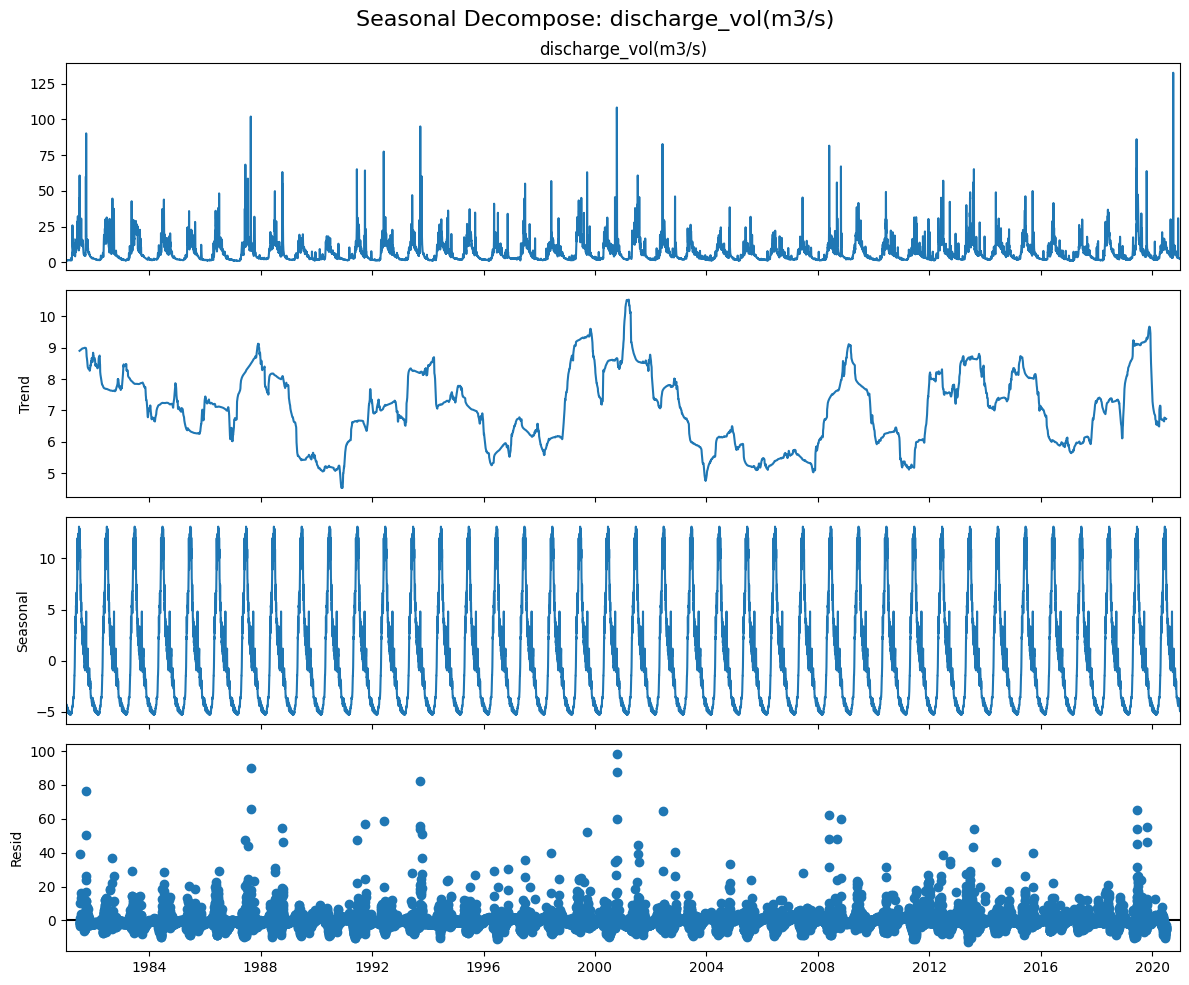

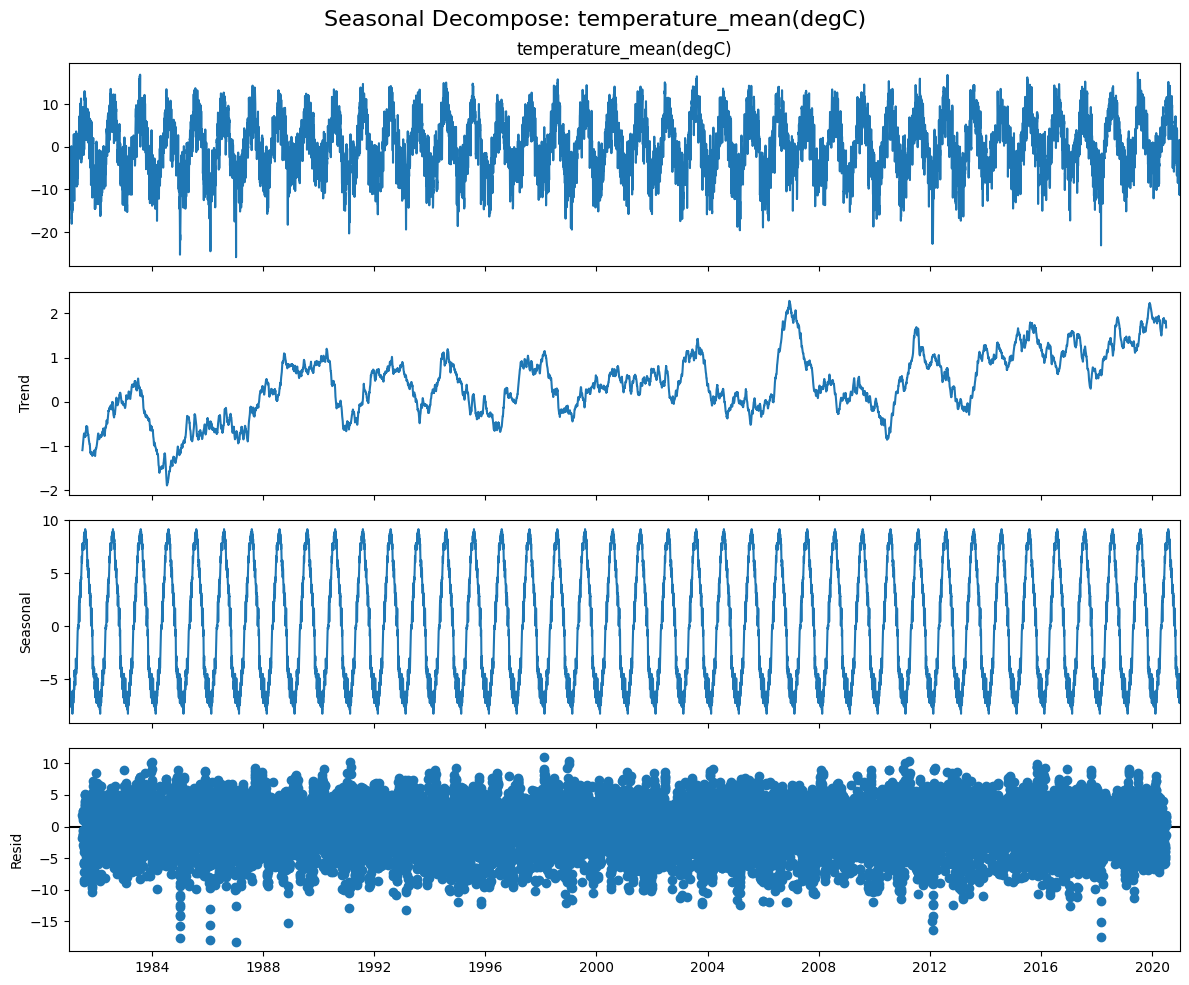

In [12]:
def plot_seasonal_decompose_all(df, period=365):
    for col in df.select_dtypes(include="number").columns:
        try:
            result = seasonal_decompose(df[col].dropna(), model='additive', period=period)
            fig = result.plot()
            fig.suptitle(f'Seasonal Decompose: {col}', fontsize=16)
            fig.set_size_inches(12, 10)
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"Fehler bei '{col}': {e}")




plot_seasonal_decompose_all(df_important_coef, period=365)


## Manuelle Zerlegung

In [13]:
# Libraries für Zeitreihenanalyse
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf, ccf
from statsmodels.tsa.stattools import adfuller

In [14]:
df_important_coef['temperature_mean(degC)']

date
1981-01-01    -7.66
1981-01-02   -10.12
1981-01-03    -3.90
1981-01-04    -7.57
1981-01-05   -14.08
              ...  
2020-12-27    -7.29
2020-12-28    -8.97
2020-12-29    -8.95
2020-12-30   -11.20
2020-12-31   -10.52
Name: temperature_mean(degC), Length: 14610, dtype: float64

C:\Users\Sandra\AppData\Local\Temp\ipykernel_12304\3418663214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_important_coef['discharge_quartile'] = pd.qcut(


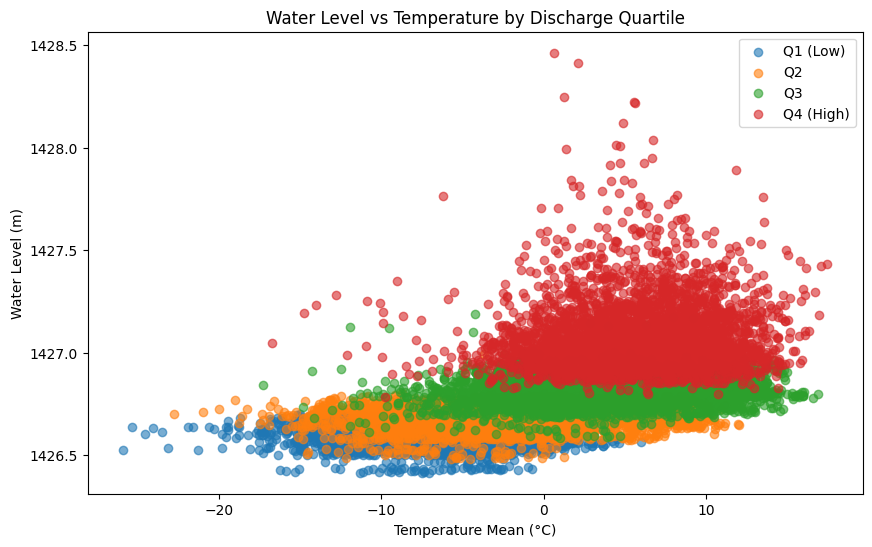

C:\Users\Sandra\AppData\Local\Temp\ipykernel_12304\3418663214.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_important_coef['temp_quartile'] = pd.qcut(


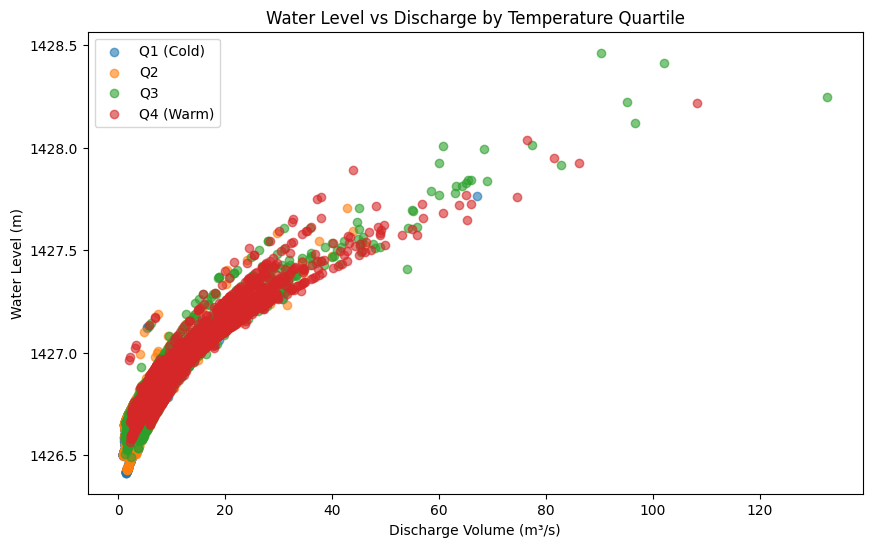

In [15]:
# Plot 1: Water Level vs Temperature by Discharge Quartile
df_important_coef['discharge_quartile'] = pd.qcut(
    df_important_coef['discharge_vol(m3/s)'], 
    q=4, 
    labels=['Q1 (Low)', 'Q2', 'Q3', 'Q4 (High)']
)

plt.figure(figsize=(10, 6))
for quartile in df_important_coef['discharge_quartile'].unique():
    subset = df_important_coef[df_important_coef['discharge_quartile'] == quartile]
    plt.scatter(subset['temperature_mean(degC)'], subset['waterlevel(m)'], 
                label=quartile, alpha=0.6)

plt.xlabel('Temperature Mean (°C)')
plt.ylabel('Water Level (m)')
plt.title('Water Level vs Temperature by Discharge Quartile')
plt.legend()
plt.show()

# Plot 2: Water Level vs Discharge by Temperature Quartile (your original plot)
df_important_coef['temp_quartile'] = pd.qcut(
    df_important_coef['temperature_mean(degC)'], 
    q=4, 
    labels=['Q1 (Cold)', 'Q2', 'Q3', 'Q4 (Warm)']
)

plt.figure(figsize=(10, 6))
for quartile in df_important_coef['temp_quartile'].unique():
    subset = df_important_coef[df_important_coef['temp_quartile'] == quartile]
    plt.scatter(subset['discharge_vol(m3/s)'], subset['waterlevel(m)'], 
                label=quartile, alpha=0.6)

plt.xlabel('Discharge Volume (m³/s)')
plt.ylabel('Water Level (m)')
plt.title('Water Level vs Discharge by Temperature Quartile')
plt.legend()
plt.show();

In [16]:
# Zerlegung in Komponenten
df_vol_comp = seasonal_decompose(df_important_coef['discharge_vol(m3/s)'], model='multiplicative')    # model : {"additive", "multiplicative"}, optional
df_temp_comp = seasonal_decompose(df_important_coef['temperature_mean(degC)'], model='additive')

TypeError: float() argument must be a string or a real number, not 'DecomposeResult'

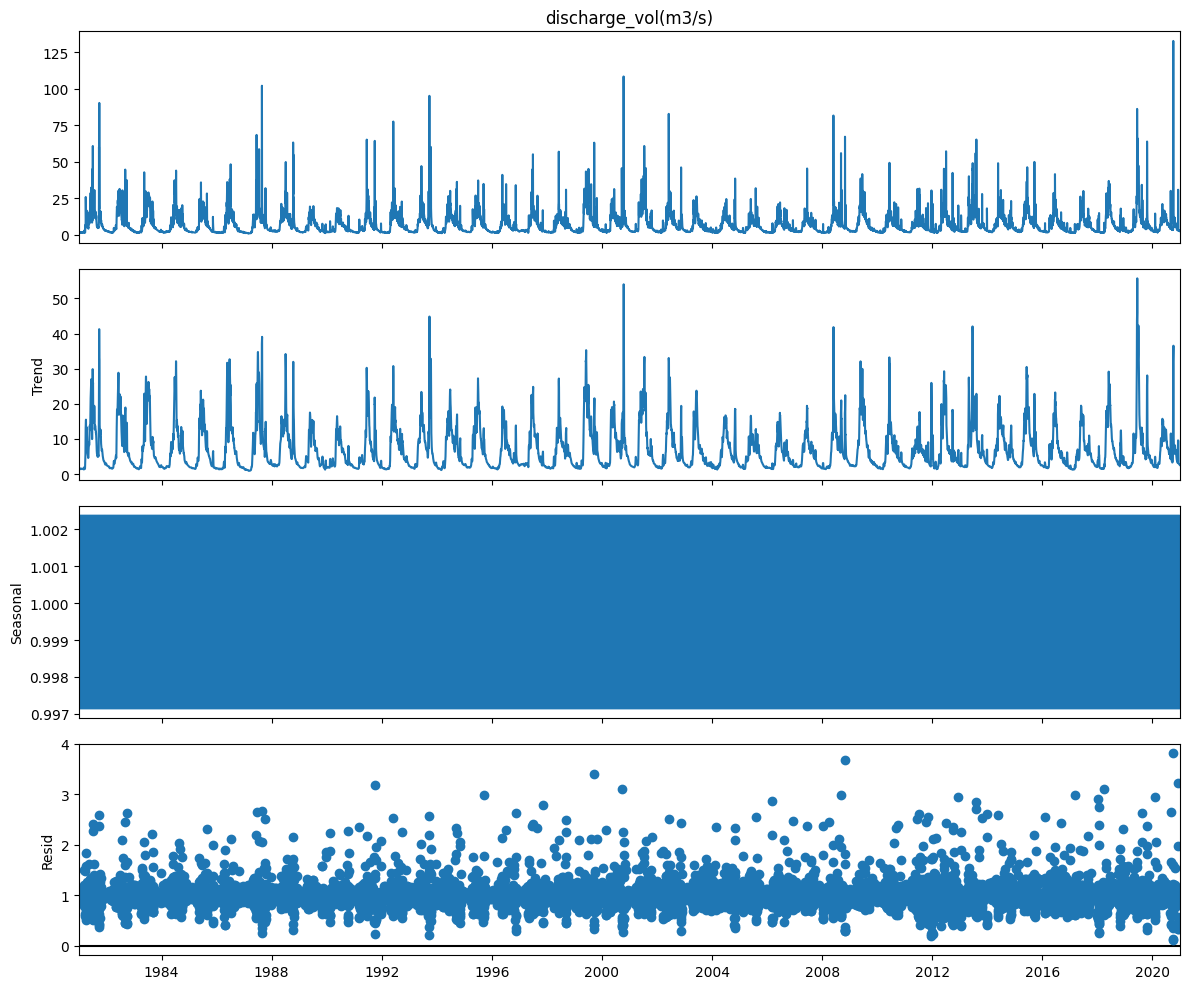

In [20]:
# 1. Zerlegung
fig=df_vol_comp.plot()
fig.set_size_inches(12,10)
fig.tight_layout()

# 2. Entfernung der NaNs
vol_trend = df_vol_comp.trend
vol_trend = vol_trend[vol_trend.notnull()]

vol_resid = df_vol_comp.resid
vol_redid = vol_resid[vol_resid.notnull()]

vol_seasonal = df_vol_comp.seasonal
vol_seasonal = vol_seasonal[vol_seasonal.notnull()]

# 3. Stationaritätstests - Plots s. Zerlegung
r=adfuller(df_vol_comp,maxlag=12)
print(f'p-Wert ganze Zeitreihe: {r[1]:.6f}')
r=adfuller(vol_redid ,maxlag=12)
print(f'p-Wert Residuen: {r[1]:.6f}')
r=adfuller(vol_trend ,maxlag=12)
print(f'p-Wert Trend: {r[1]:.6f}')

TypeError: float() argument must be a string or a real number, not 'DecomposeResult'

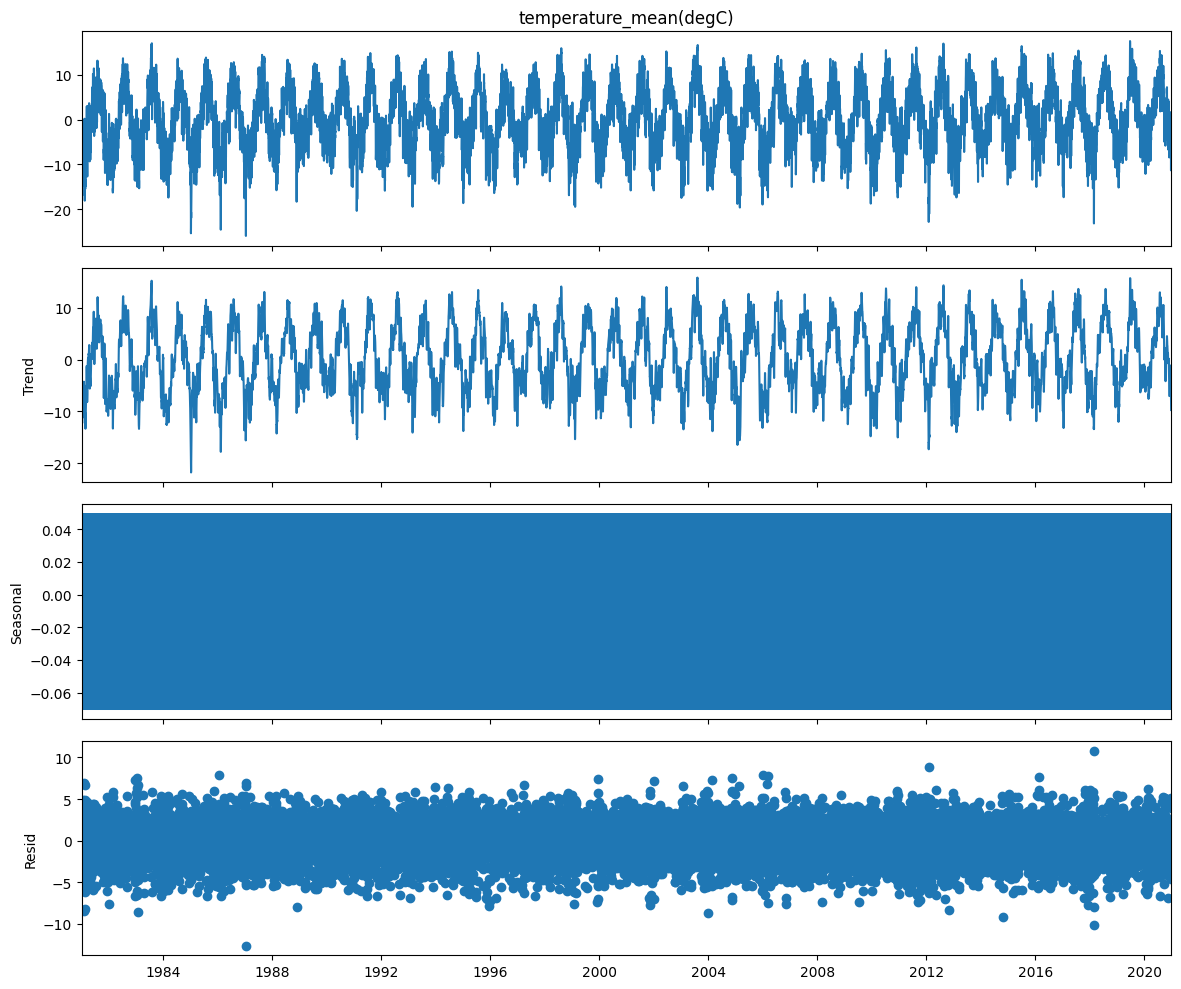

In [21]:
# 1. Zerlegung
fig=df_temp_comp.plot()
fig.set_size_inches(12,10)
fig.tight_layout()

# 2. Entfernung der NaNs
temp_trend = df_temp_comp.trend
temp_trend = temp_trend[temp_trend.notnull()]

temp_resid = df_temp_comp.resid
temp_resid = temp_resid[temp_resid.notnull()]

temp_seasonal = df_temp_comp.seasonal
temp_seasonal = temp_seasonal[temp_seasonal.notnull()]

# 3. Stationaritätstests - Plots s. Zerlegung
r=adfuller(df_temp_comp,maxlag=12)
print(f'p-Wert ganze Zeitreihe: {r[1]:.6f}')
r=adfuller(temp_resid ,maxlag=12)
print(f'p-Wert Residuen: {r[1]:.6f}')
r=adfuller(temp_trend ,maxlag=12)
print(f'p-Wert Trend: {r[1]:.6f}')